In [9]:
import pandas as pd

#Task 1
file_path = "En_In.xlsx"

en_in_df = pd.read_excel(file_path, skiprows=16, nrows=(245 - 17))

en_in_df = en_in_df.iloc[:, 2:]


en_in_df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

en_in_df = en_in_df.drop(index=0)


#Task 2
en_in_df['Energy Supply'] = pd.to_numeric(en_in_df['Energy Supply'], errors='coerce') 
en_in_df['Energy Supply per Capita'] = pd.to_numeric(en_in_df['Energy Supply per Capita'], errors='coerce')
en_in_df['Energy Supply'] = en_in_df['Energy Supply'] * 1_000_000


#Task 3
country_rename_map = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}


en_in_df['Country'] = en_in_df['Country'].replace(country_rename_map)


#Task 4
en_in_df['Country'] = en_in_df['Country'].str.replace(r'\(.*\)', '', regex=True)  
en_in_df['Country'] = en_in_df['Country'].str.replace(r'\d+', '', regex=True)    


en_in_df['Country'] = en_in_df['Country'].str.strip()


print(en_in_df.to_string())

                                            Country  Energy Supply  Energy Supply per Capita % Renewable
1                                       Afghanistan   3.210000e+08                      10.0    78.66928
2                                           Albania   1.020000e+08                      35.0         100
3                                           Algeria   1.959000e+09                      51.0     0.55101
4                                    American Samoa            NaN                       NaN    0.641026
5                                           Andorra   9.000000e+06                     121.0    88.69565
6                                            Angola   6.420000e+08                      27.0    70.90909
7                                          Anguilla   2.000000e+06                     136.0           0
8                               Antigua and Barbuda   8.000000e+06                      84.0           0
9                                         Argentina   3

In [10]:
gpd_df = pd.read_csv('gpd.csv', skiprows=4)

country_rename = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gpd_df['Country Name'] = gpd_df['Country Name'].replace(country_rename)


print(gpd_df.iloc[:, :11].head())

  Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  GDP at market prices (constant 2010 US$)   
1      Andorra          AND  GDP at market prices (constant 2010 US$)   
2  Afghanistan          AFG  GDP at market prices (constant 2010 US$)   
3       Angola          AGO  GDP at market prices (constant 2010 US$)   
4      Albania          ALB  GDP at market prices (constant 2010 US$)   

   Indicator Code  1960  1961  1962  1963  1964  1965  1966  
0  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN   NaN  


In [11]:
scimagojr_df = pd.read_excel('scimagojr.xlsx')
gpd_df = gpd_df.rename(columns={'Country Name': 'Country'})

merged_df = en_in_df.merge(gpd_df, on='Country', how='inner').merge(scimagojr_df, on='Country', how='inner')
filtered_df = merged_df[(merged_df['Rank'] >= 1) & (merged_df['Rank'] <= 15)].sort_values(by='Rank')
filtered_df = filtered_df.set_index('Country')
nessecarry_coulms = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                     'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

filtered_df = filtered_df[nessecarry_coulms]
print(filtered_df.head())

                    Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   

                    Self-citations  Citations per document  H index  \
Country                                                               
China                       411683                    4.70      138   
United States               265436                    8.20      230   
Japan                        61554                    7.31      134   
United Kingdom               37874                    9.84      139   
Russian Federation           12422                    1.85       57   

                  

In [12]:
def task_eight():
    years = [str(year) for year in range(2006, 2016)]
    filtered_df['avgGDP'] = filtered_df[years].mean(axis=1)
    sorted_avg_gdp = filtered_df['avgGDP'].sort_values(ascending=False)
    return sorted_avg_gdp

avg_gdp_series = task_eight()
print(avg_gdp_series)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64


In [13]:
def gdp_change_for_5th_country(filtered_df, avg_gdp_series):
    country = avg_gdp_series.index[4]  
    gdp_change = filtered_df.loc[country, '2015'] - filtered_df.loc[country, '2006']
    return (country, gdp_change)

country, gdp_change = gdp_change_for_5th_country(filtered_df, avg_gdp_series)
print(country, gdp_change)

France 153345695364.24023


In [14]:
def max_renewable_country(df):
    max_renewable = df['% Renewable'].idxmax()
    return (max_renewable, df.loc[max_renewable, '% Renewable'])

country, renewable = max_renewable_country(filtered_df)
print(country, renewable)

Brazil 69.64803


In [15]:
def population_estimation(df):
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    sixth_country = df['Population'].sort_values(ascending=False).index[5]
    return (sixth_country, df.loc[sixth_country, 'Population'])

country, population = population_estimation(filtered_df)
print(country, population)

Japan 127409395.97315437


In [99]:
def citations_correlation(df):
    df['Citable docs per Capita'] = df['Citable documents'] / df['Population']
    correlation = df['Citable docs per Capita'].corr(df['Energy Supply per Capita'])
    return correlation

correlation = citations_correlation(filtered_df)
print(correlation)

0.7940010435442942


In [104]:
def renewable_energy_classification(filtered_df):
    median_renewable = filtered_df['% Renewable'].median()
    filtered_df['Renewable Above Median'] = (filtered_df['% Renewable'] >= median_renewable).astype(int)
    sorted_df = filtered_df.sort_values(by='Rank')
    return sorted_df['Renewable Above Median']

renewable_series = renewable_energy_classification(filtered_df)
print(renewable_series)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
                     ..
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Above Median, Length: 15, dtype: int64


In [105]:
import numpy as np

def population_statistics(filtered_df):
    ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }

    filtered_df['Continent'] = filtered_df.index.map(ContinentDict)

    filtered_df['Population'] = filtered_df['Energy Supply'] / filtered_df['Energy Supply per Capita']

    continent_stats = filtered_df.groupby('Continent')['Population'].agg(
        size='count',  
        sum='sum',     
        mean='mean',  
        std='std'      
    ).reset_index()

    continent_stats = continent_stats.set_index('Continent')
    return continent_stats

continent_stats_df = population_statistics(filtered_df)
print(continent_stats_df)

               size           sum          mean           std
Continent                                                    
Asia              5  2.898666e+09  5.797333e+08  6.790979e+08
Australia         1  2.331602e+07  2.331602e+07           NaN
Europe            6  4.579297e+08  7.632161e+07  3.464767e+07
North America     2  3.528552e+08  1.764276e+08  1.996696e+08
South America     1  2.059153e+08  2.059153e+08           NaN


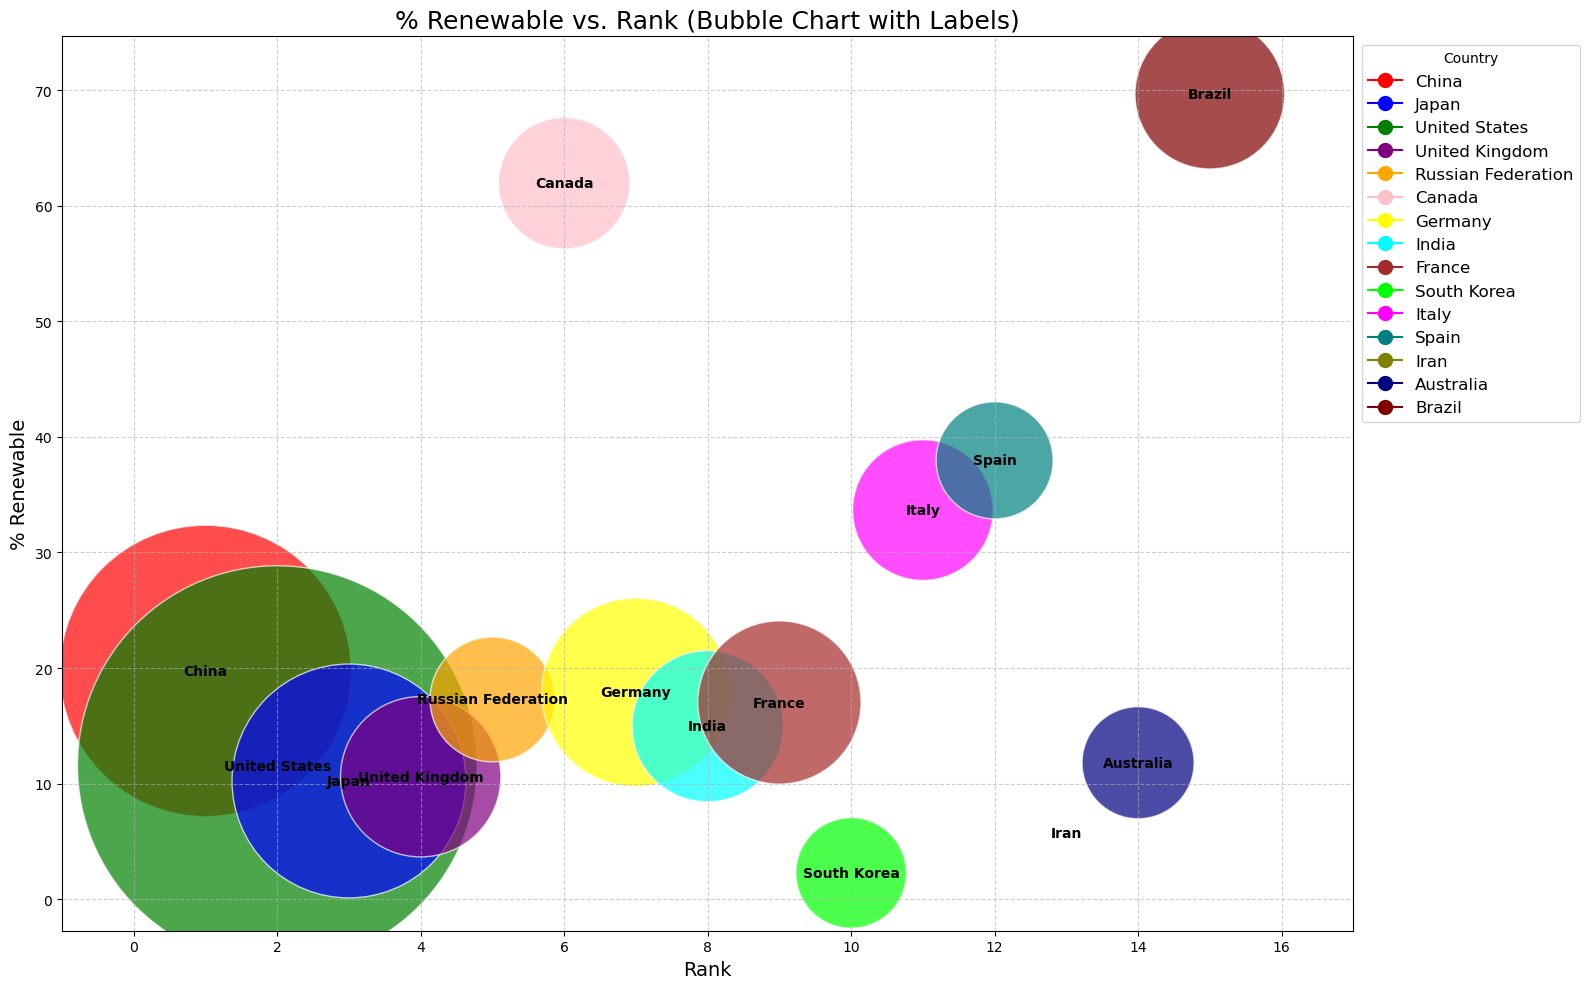

In [111]:
import matplotlib.pyplot as plt

def bubble_chart_with_labels(filtered_df):
    country_colors = {
        'China': 'red',
        'Japan': 'blue',
        'United States': 'green',
        'United Kingdom': 'purple',
        'Russian Federation': 'orange',
        'Canada': 'pink',
        'Germany': 'yellow',
        'India': 'cyan',
        'France': 'brown',
        'South Korea': 'lime',
        'Italy': 'magenta',
        'Spain': 'teal',
        'Iran': 'olive',
        'Australia': 'navy',
        'Brazil': 'maroon'
    }

    filtered_df['Color'] = filtered_df.index.map(country_colors)
    plt.figure(figsize=(16, 10))

    scatter = plt.scatter(
        filtered_df['Rank'], 
        filtered_df['% Renewable'], 
        s=filtered_df['2015'] / 2e8,  
        c=filtered_df['Color'],       
        alpha=0.7,                   
        edgecolors="w",               
        linewidth=1
    )

    for i, row in filtered_df.iterrows():
        plt.text(
            row['Rank'], row['% Renewable'], i, 
            fontsize=10, ha='center', va='center', color='black', weight='bold'
        )

    plt.title('% Renewable vs. Rank (Bubble Chart with Labels)', fontsize=18)
    plt.xlabel('Rank', fontsize=14)
    plt.ylabel('% Renewable', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.xlim(filtered_df['Rank'].min() - 2, filtered_df['Rank'].max() + 2)
    plt.ylim(filtered_df['% Renewable'].min() - 5, filtered_df['% Renewable'].max() + 5)

    handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, label=country)
               for country, color in country_colors.items()]
    plt.legend(handles=handles, title='Country', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

bubble_chart_with_labels(filtered_df)